In [37]:
import sys
import os
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px


In [38]:
!{sys.executable} -m pip install fredapi > NUL 2>&1

In [46]:
from dotenv import load_dotenv
load_dotenv(dotenv_path='../.env')
api_key = os.getenv("FRED_API_KEY")

In [43]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [48]:
from fredapi import Fred
fred = Fred(api_key=api_key)

In [52]:
sp_search = fred.search('S&P', order_by='popularity')

In [54]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-07-02,2025-07-02,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-07-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-02 09:57:05-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2025-07-02,2025-07-02,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-04-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-06-24 08:12:56-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2025-07-02,2025-07-02,S&P 500,2015-07-06,2025-07-02,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-07-02 19:03:03-05:00,83,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-07-02,2025-07-02,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-07-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-02 09:57:09-05:00,82,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-07-02,2025-07-02,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-07-01,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-07-02 10:05:02-05:00,78,The ICE BofA Option-Adjusted Spreads (OASs) ar...


<Axes: title={'center': 'S&P 500'}>

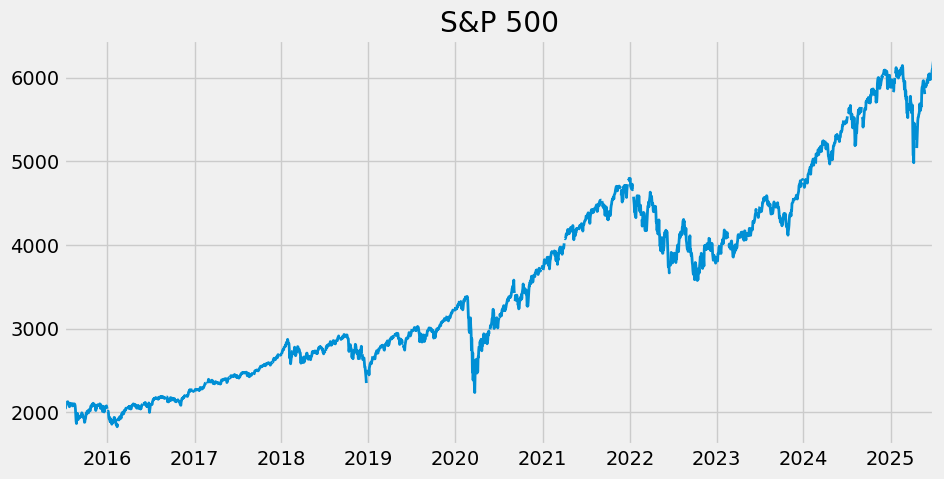

In [60]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(10, 5), title = 'S&P 500', lw=2)

In [62]:
unemp_results = fred.search('unemployment')
unemp_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-07-02,2025-07-02,Unemployment Rate,1948-01-01,2025-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-06-06 07:46:05-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2025-07-02,2025-07-02,Unemployment Rate,1948-01-01,2025-05-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2025-06-06 07:46:04-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2025-07-02,2025-07-02,Unemployment Level,1948-01-01,2025-05-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2025-06-06 07:48:43-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2025-07-02,2025-07-02,Noncyclical Rate of Unemployment,1949-01-01,2035-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2025-03-17 15:44:05-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2025-07-02,2025-07-02,Continued Claims (Insured Unemployment),1967-01-07,2025-06-14,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2025-06-26 07:33:02-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENUC317430010,ENUC317430010,2025-07-02,2025-07-02,"Total Quarterly Wages in Manhattan, KS (MSA)",2013-01-01,2024-10-01,Quarterly,Q,Dollars,$,Not Seasonally Adjusted,NSA,2025-06-04 11:20:23-05:00,1,Total wages are the wages paid by Unemployment...
IPUEN3116L020000000,IPUEN3116L020000000,2025-07-02,2025-07-02,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2024-01-01,Annual,A,Millions of Dollars,Mil. of $,Not Seasonally Adjusted,NSA,2025-04-24 15:24:03-05:00,1,"Labor compensation, defined as payroll plus su..."
IPUEN3116U110000000,IPUEN3116U110000000,2025-07-02,2025-07-02,Labor Compensation for Manufacturing: Animal S...,1987-01-01,2024-01-01,Annual,A,Index 2017=100,Index 2017=100,Not Seasonally Adjusted,NSA,2025-04-24 15:24:02-05:00,1,"Labor compensation, defined as payroll plus su..."


<Axes: >

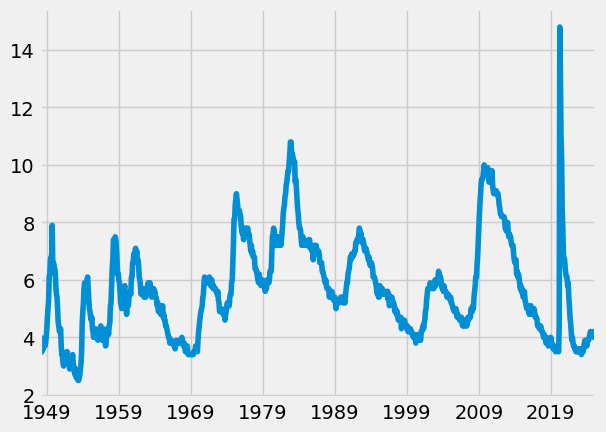

In [65]:
unrate = fred.get_series(series_id='UNRATE')
unrate.plot()

In [77]:
unem_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unem_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2025-07-03,2025-07-03,Unemployment Rate,1948-01-01,2025-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-06-06 07:46:05-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2025-07-03,2025-07-03,Unemployment Rate - Black or African American,1972-01-01,2025-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-06-06 07:48:22-05:00,72,The series comes from the 'Current Population ...
U6RATE,U6RATE,2025-07-03,2025-07-03,"Total Unemployed, Plus All Persons Marginally ...",1994-01-01,2025-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-06-06 07:46:19-05:00,67,The series comes from the 'Current Population ...
CAUR,CAUR,2025-07-03,2025-07-03,Unemployment Rate in California,1976-01-01,2025-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-06-25 13:33:08-05:00,64,None
TXUR,TXUR,2025-07-03,2025-07-03,Unemployment Rate in Texas,1976-01-01,2025-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-06-25 13:32:12-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2025-07-03,2025-07-03,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
LNS14000024,LNS14000024,2025-07-03,2025-07-03,Unemployment Rate - 20 Yrs. & over,1948-01-01,2025-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-06-06 07:48:21-05:00,56,The series comes from the 'Current Population ...
LNS14000031,LNS14000031,2025-07-03,2025-07-03,"Unemployment Rate - 20 Yrs. & over, Black or A...",1972-01-01,2025-05-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2025-06-06 07:48:21-05:00,56,The series comes from the 'Current Population ...
M0892BUSM156SNBR,M0892BUSM156SNBR,2025-07-03,2025-07-03,Unemployment Rate for United States,1940-01-01,1946-12-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:29:19-05:00,14,Series Is Presented Here As Three Variables--(...
